In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from misc import colors
from stpipes import v5 as p
%matplotlib inline
plt.rc('figure', figsize=(16, 8))

In [2]:
bonds = [    
    'AGG', # iShares Core U.S. Aggregate Bond ETF
    'IEI',  # iShares 3-7 Year Treasury Bond ETF
    'TLT', # iShares 20+ Year Treasury Bond ETF
    'IEF', # iShares 7-10 Year Treasury Bond ETF
]

In [3]:
BOND = p.execute(
    p.ClosePrice(),
    bonds + ['SPY'],
)['close']

In [4]:
BOND['TLT'].dropna().head()

date
2002-07-30    45.386842
2002-07-31    45.945252
2002-08-01    46.210725
2002-08-02    46.677593
2002-08-05    46.888141
Name: TLT, dtype: float64

In [5]:
BOND = BOND[BOND.index >= '2002/07/30']

In [6]:
BOND.head()

,AGG,IEI,TLT,IEF,SPY
date,,,,,
2002-07-30,NaN,NaN,45.386842,49.143354,67.536977
2002-07-31,NaN,NaN,45.945252,49.592066,67.700362
2002-08-01,NaN,NaN,46.210725,49.797726,65.932841
2002-08-02,NaN,NaN,46.677593,50.181001,64.454961
2002-08-05,NaN,NaN,46.888141,50.433402,62.212142


In [7]:
BOND.tail()

,AGG,IEI,TLT,IEF,SPY
date,,,,,
2017-08-18,109.95,124.31,126.62,107.57,242.71
2017-08-21,110.03,124.34,126.93,107.64,242.90
2017-08-22,109.93,124.20,126.44,107.43,245.44
2017-08-24,110.04,124.28,126.83,107.63,243.99
2017-08-25,110.12,124.38,127.32,107.81,244.56


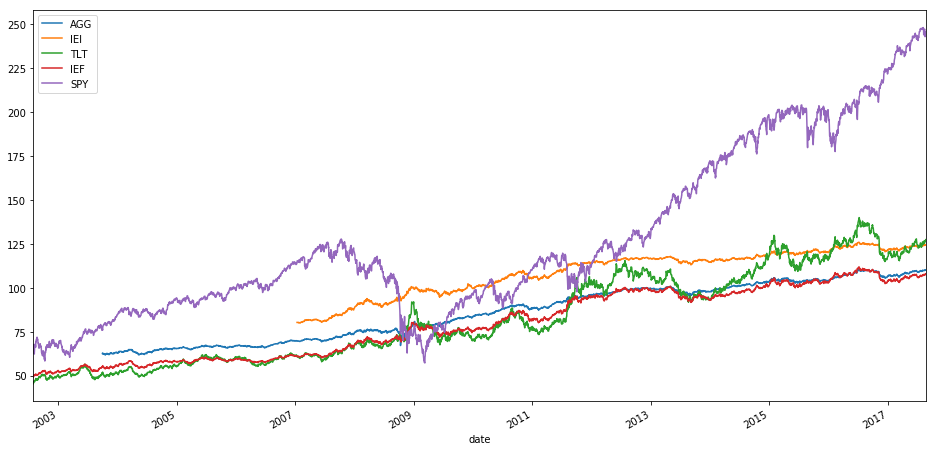

In [8]:
BOND.plot()

## 1 Day Correlation

In [9]:
BOND.pct_change().corr()

,AGG,IEI,TLT,IEF,SPY
AGG,1.000000,0.586215,0.614992,0.689751,-0.112142
IEI,0.586215,1.000000,0.775398,0.915471,-0.437923
TLT,0.614992,0.775398,1.000000,0.909874,-0.409294
IEF,0.689751,0.915471,0.909874,1.000000,-0.402523
SPY,-0.112142,-0.437923,-0.409294,-0.402523,1.000000


## 1 Week Correlation

In [10]:
BOND.resample('1W').last().pct_change().corr()

,AGG,IEI,TLT,IEF,SPY
AGG,1.000000,0.575478,0.562858,0.690706,0.088263
IEI,0.575478,1.000000,0.749622,0.925321,-0.388418
TLT,0.562858,0.749622,1.000000,0.895181,-0.397967
IEF,0.690706,0.925321,0.895181,1.000000,-0.356338
SPY,0.088263,-0.388418,-0.397967,-0.356338,1.000000


## 1Month Correlation

In [11]:
BOND.resample('1M').last().pct_change().corr()

,AGG,IEI,TLT,IEF,SPY
AGG,1.000000,0.692597,0.786095,0.850182,0.039073
IEI,0.692597,1.000000,0.714632,0.910115,-0.307116
TLT,0.786095,0.714632,1.000000,0.907978,-0.307543
IEF,0.850182,0.910115,0.907978,1.000000,-0.297444
SPY,0.039073,-0.307116,-0.307543,-0.297444,1.000000


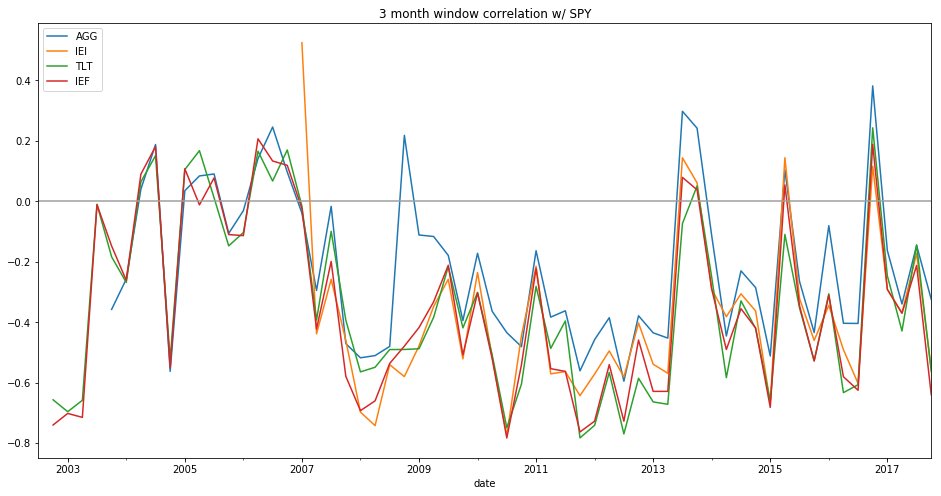

In [12]:
_ = BOND.pct_change().groupby(pd.Grouper(freq='3M')).corr()['SPY'].unstack().drop('SPY', axis=1).plot()
plt.axhline(0, color=colors.LIGHT_GRAY)
plt.title('3 month window correlation w/ SPY')

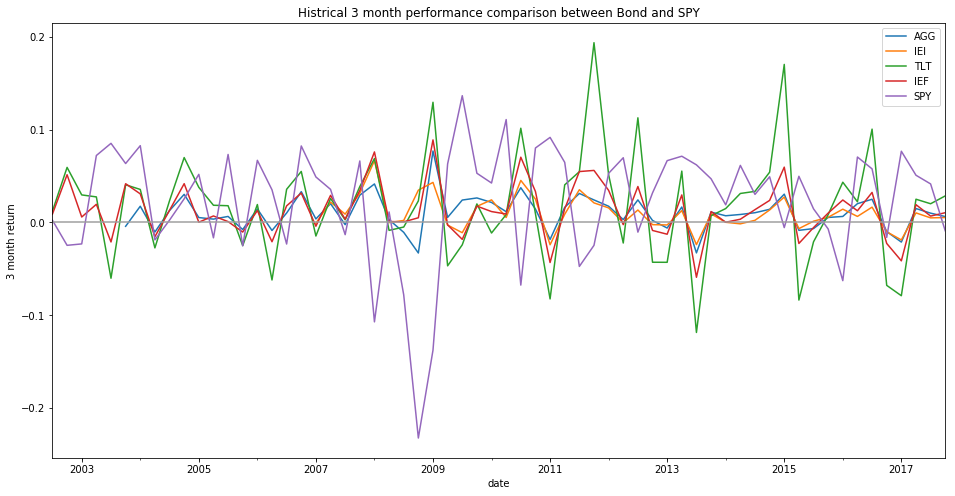

In [13]:
m3perf = BOND.pct_change().groupby(pd.Grouper(freq='3M')).apply(lambda x:  (1+x).prod() - 1)
m3perf.plot()
plt.axhline(0, color=colors.LIGHT_GRAY)
plt.title('Histrical 3 month performance comparison between Bond and SPY')
plt.ylabel('3 month return')

In [14]:
import empyrical as emp
m1perf = BOND.pct_change().groupby(pd.Grouper(freq='1M')).apply(lambda x:  (1+x).prod() - 1)
pd.DataFrame([
    (x, emp.sharpe_ratio(m1perf[x], period='monthly'))
    for x in m1perf
], columns=['Asset', 'Sharpe'])

,Asset,Sharpe
0,AGG,1.121827
1,IEI,1.097009
2,TLT,0.582263
3,IEF,0.829126
4,SPY,0.686925


### Insights
- On financial crisis on 2008, both US market and bonds went down.
- It turns to be correlated in several period in this period, but it looks lower freq.

## Performance of Portfolio with BOND and SPY

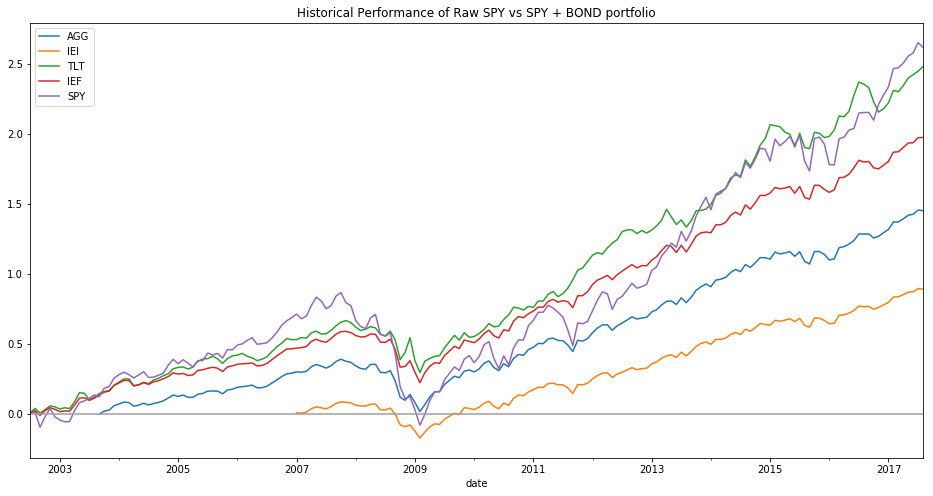

In [15]:
y = BOND.pct_change().groupby(pd.Grouper(freq='1M')).apply(lambda x:  (1+x).prod()) - 1
m1pf = (y.add(y['SPY'], axis=0) / 2)
((m1pf + 1).cumprod() - 1).plot()
plt.axhline(0, color=colors.LIGHT_GRAY)
plt.legend()
plt.title('Historical Performance of Raw SPY vs SPY + BOND portfolio')

In [16]:
import empyrical as emp

for x in m1pf:
    print('Portfolio {} / Sharpe Ratio {:.3f}'.format(x, emp.sharpe_ratio(m1pf[x], period='monthly')))

Portfolio AGG / Sharpe Ratio 0.948
Portfolio IEI / Sharpe Ratio 0.884
Portfolio TLT / Sharpe Ratio 1.080
Portfolio IEF / Sharpe Ratio 1.111
Portfolio SPY / Sharpe Ratio 0.687


### Warning
- This portfolio doesn't consider about yield, so probably bonds performce well than here.

### Insights
- Long term bond + SPY portfolio looks like woking pretty well. The best in total return and sharpe ratio.

/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


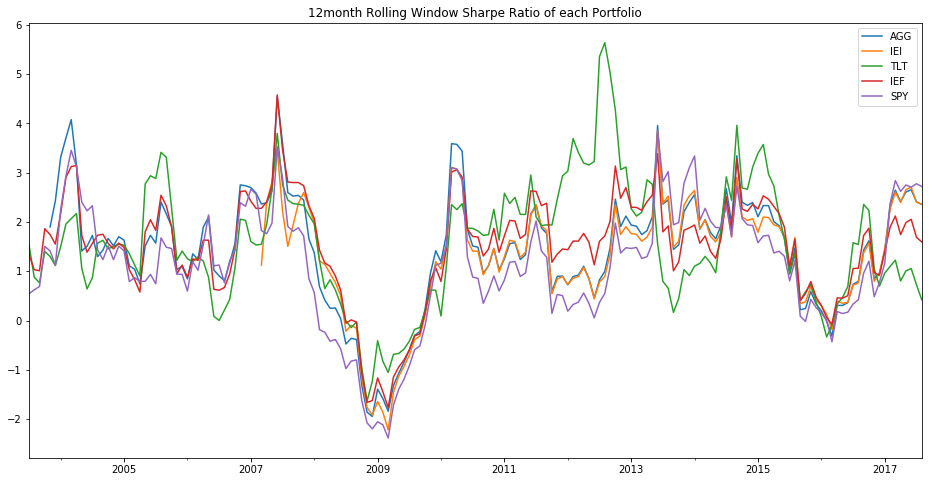

In [17]:
import empyrical as emp
pd.concat([
    emp.roll_sharpe_ratio(m1pf[x], period='monthly', window=12).rename(x)
    for x in m1pf
], axis=1).plot()
plt.title('12month Rolling Window Sharpe Ratio of each Portfolio')